In [1]:
import os
import re
import uproot
import numpy as np

import matplotlib.pyplot as plt
%matplotlib widget

In [2]:
# o stands for "old"
ofname = os.path.expandvars("$LUSTRE/CProfiles/e-/tuning/cprofiles_merged.root")
fname  = os.path.expandvars("$THRONG_DIR/hk_prod_0.2.7_sand/opt/HyperK/WCSimFQTuningTools/CProfiles/cprofiles_all_merged.root")

of = uproot.open(ofname)
f  = uproot.open(fname)

In [3]:
energy = 300.0

oh, othbins, osbins = of[f"g_{energy}"].to_numpy()
h ,  thbins, sbins  =  f[f"g_{energy}"].to_numpy()

# osbins *= 1/10
# sbins  *= 1/10

# np.testing.assert_allclose(othbins, thbins)
# np.testing.assert_allclose( osbins, sbins)

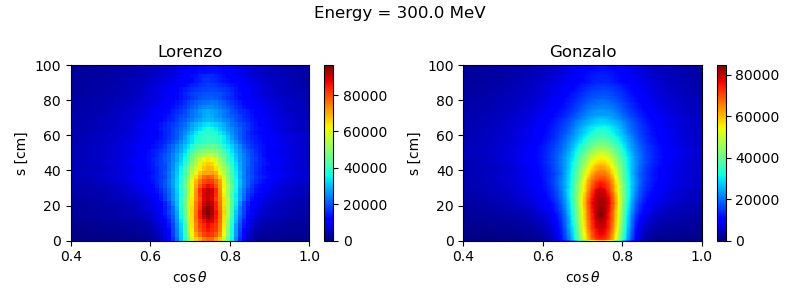

In [ ]:
xlim = [0.4, None]
ylim = [None, 100]

plt.figure(figsize=[8, 3])

plt.suptitle(f"Energy = {energy} MeV")

plt.subplot(121)
plt.title("Lorenzo")
plt.imshow(h.T, origin="lower", extent=[thbins[0], thbins[-1], sbins[0], sbins[-1]], cmap="jet", aspect="auto")
plt.xlim(xlim)
plt.ylim(ylim)
plt.xlabel(r"$\cos \theta$")
plt.ylabel("s [cm]")
plt.colorbar()

plt.subplot(122)
plt.title("Gonzalo")
plt.imshow(oh.T, origin="lower", extent=[othbins[0], othbins[-1], osbins[0], osbins[-1]], cmap="jet", aspect="auto")
plt.xlim(xlim)
plt.ylim(ylim)
plt.xlabel(r"$\cos \theta$")
plt.ylabel("s [cm]")
plt.colorbar()

plt.tight_layout()

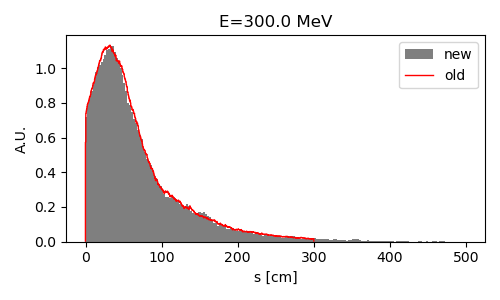

In [24]:
# s projections 
plt.figure(figsize=[5, 3])
plt.title(f"E={energy} MeV")

# new
normed_h = (h / (h.sum()*(sbins[1] - sbins[0])*(thbins[1] - thbins[0])))
plt.stairs( normed_h.sum(axis=0),  sbins, label="new", color="k", fill=True, alpha=0.5)

# old
normed_oh = (oh / (oh.sum()*(osbins[1] - osbins[0])*(othbins[1] - othbins[0])))
plt.stairs(normed_oh.sum(axis=0), osbins, label="old", color="r")

plt.xlabel("s [cm]")
plt.ylabel("A.U.")
plt.legend()
plt.tight_layout()

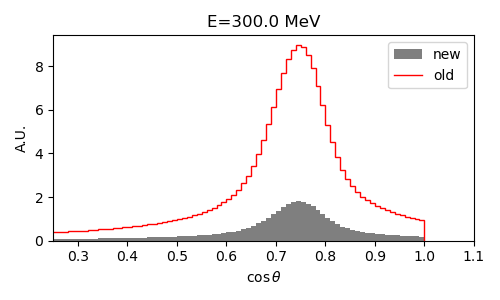

In [25]:
# th projections 
plt.figure(figsize=[5, 3])
plt.title(f"E={energy} MeV")

# new
normed_h = (h / (h.sum()*(sbins[1] - sbins[0])*(thbins[1] - thbins[0])))
plt.stairs( normed_h.sum(axis=1),  thbins, label="new", color="k", fill=True, alpha=0.5)

# old
normed_oh = (oh / (oh.sum()*(osbins[1] - osbins[0])*(othbins[1] - othbins[0])))
plt.stairs(normed_oh.sum(axis=1), othbins, label="old", color="r")

plt.xlabel(r"$\cos \theta$")
plt.ylabel("A.U.")
plt.xlim([0.25, 1.1])
plt.legend()
plt.tight_layout()

In [29]:
# es , nph  =  f["gNphot"].values()
# oes, onph = of["gNphot"].values()


# plt.figure(figsize=[5, 3])
# plt.scatter(es, nph, color="k", s=10, label="new")
# plt.scatter(oes, onph, color="none", edgecolor="red", s=10, label="old")

# # plt.yscale("log")
# plt.xlabel("E [MeV]")
# plt.ylabel("# photons")
# plt.legend()
# plt.tight_layout()

In [31]:
# es , nph  =  f["gsthr"].values()
# oes, onph = of["gsthr"].values()


# plt.figure(figsize=[5, 3])

# plt.scatter(es, nph, color="k", s=10, label="new")
# plt.scatter(oes, onph/10., color="none", edgecolor="red", s=10, label="old")

# # plt.yscale("log")
# plt.xlabel("E [MeV]")
# plt.ylabel("s @ 90%")
# plt.legend()
# plt.tight_layout()

In [10]:
qs = []
for name in of.classnames():
    if re.match("g_\d+_\d+", name):
        oh, _, _ = of[f"g_11_{int(energy)}"].to_numpy()
        h , _, _ =  f[f"g_{energy}"]        .to_numpy()
        qs.append(h/oh)
qs = np.array(qs).flatten()

/scratch/users/g/gdiazlop/ipykernel_10621/2546572415.py:6: RuntimeWarning: divide by zero encountered in divide
  qs.append(h/oh)
/scratch/users/g/gdiazlop/ipykernel_10621/2546572415.py:6: RuntimeWarning: invalid value encountered in divide
  qs.append(h/oh)


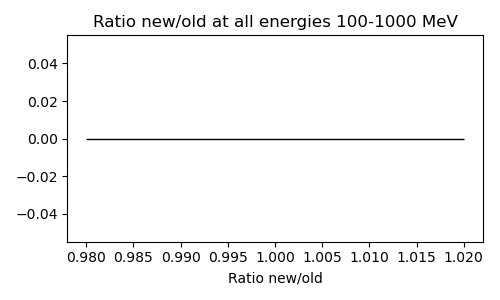

In [11]:
plt.figure(figsize=(5, 3))
plt.title("Ratio new/old at all energies 100-1000 MeV")

sel = np.isnan(qs)
plt.hist(qs[~sel], bins=np.linspace(0.98, 1.02, 100), histtype="step", color="black")

plt.xlabel("Ratio new/old")
plt.tight_layout()